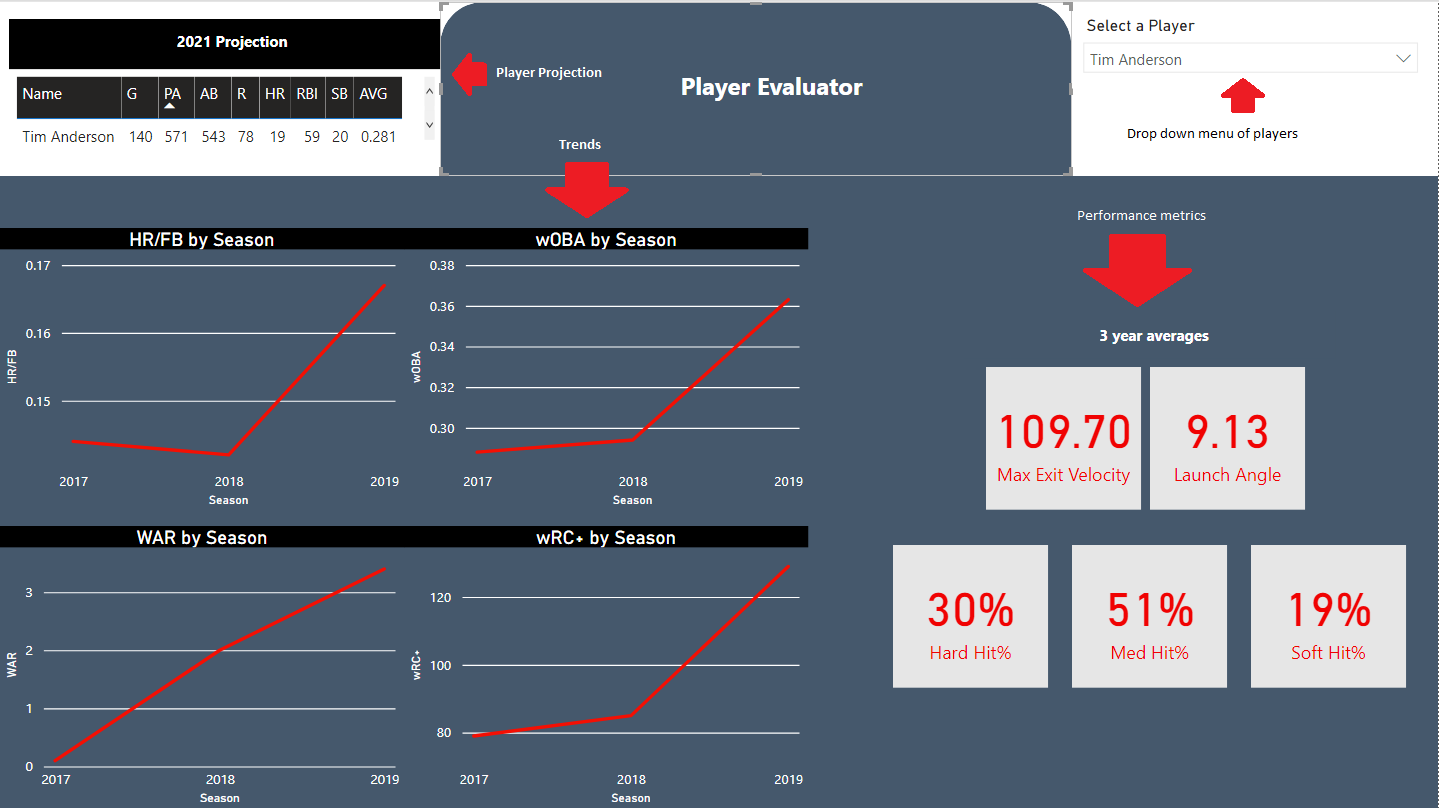

In [2]:
from IPython.display import Image
Image("PlayerEvaluator.png")

# Player Analysis / Data Visualization

# Player Tool

In [64]:
player_name = input("Enter player name: ")
plt_df = forcast_data[forcast_data['Name'] == player_name]
projection = player_projection(player_name)
similarity_score = similarity_scores(final_df_grp, player_names ,player_name)
projection_grp = projection.groupby('Name').mean()
similarity_score_grp = similarity_score.groupby('Name').mean()
print("")
print("")
print(player_name, "2021 projection:")
print("")
print(projection_grp)
print("")
print("List of players that are similar to ", player_name)
print("")
print(similarity_score_grp.sort_values('Similiarity_Score')[['Similiarity_Score']].iloc[1:6,0:9])
print("")
print("2021 Projections of similar players")
print("")
print(similarity_score_grp.sort_values('Similiarity_Score').iloc[1:6,0:8])
print("")
print("Three year average for ", player_name)
print("")
print("Games: ", round(plt_df["G"].mean(),0))
print("Plate Apperances: ", round(plt_df["PA"].mean(),0)) 
print("Runs: ", round(plt_df["R"].mean(),0)) 
print("Homeruns: ", round(plt_df["HR"].mean(),0)) 
print("Runs Batted In: ", round(plt_df["RBI"].mean(),0)) 
print("Stolen Bases: ", round(plt_df["SB"].mean(),0))
print("Batting Average: ", round(plt_df["AVG"].mean(),3))

Enter player name: Tim Anderson


Tim Anderson 2021 projection:

                  G     PA     AB     R    HR   RBI    SB    AVG
Name                                                            
Tim Anderson  140.0  571.0  543.0  78.0  19.0  59.0  20.0  0.281

List of players that are similar to  Tim Anderson

                Similiarity_Score
Name                             
Tommy Pham                   0.99
Elvis Andrus                 1.29
Jean Segura                  1.35
Starling Marte               1.52
Yasiel Puig                  1.56

2021 Projections of similar players

                    G     PA     AB     R    HR   RBI    SB    AVG
Name                                                              
Tommy Pham      138.0  596.0  513.0  91.0  21.0  67.0  21.0  0.280
Elvis Andrus    129.0  568.0  527.0  74.0  11.0  60.0  19.0  0.272
Jean Segura     140.0  613.0  570.0  84.0  11.0  58.0  16.0  0.294
Starling Marte  126.0  545.0  501.0  81.0  19.0  68.0  27.0  0.284
Yasiel Pui

In [2]:
"""The results above show the 2021 projection for Tim Anderson. Additionally, the result returns a list of 5 players that are most like Tim Anderson based on the metrics the model was built from: G, PA, AB, R, HR, RBI, SB, and AVG. A similarity score of 0 denotes a player being more like Tim Anderson than a player whose similarity score is closer to 1. In addition, to similarity scores, those players projected stats for the following season is given as well. This can help a user evaluate players and make decisions on who to sign or trade for."""

'The results above show the 2021 projection for Tim Anderson. Additionally, the result returns a list of 5 players that are most like Tim Anderson based on the metrics the model was built from: G, PA, AB, R, HR, RBI, SB, and AVG. A similarity score of 0 denotes a player being more like Tim Anderson than a player whose similarity score is closer to 1. In addition, to similarity scores, those players projected stats for the following season is given as well. This can help a user evaluate players and make decisions on who to sign or trade for.'

# Loading Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Functions Used

In [2]:
def player_projection(player_name):
    player_projection = final_df[final_df['Name'] == player_name]
    return player_projection

In [3]:
def similarity_scores(players_df_grp, player_names, player_name):
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(players_df_grp)
    
    scaled_data = pd.DataFrame(scaled_data, columns= [ 'G', 'PA', 'AB', 'R', 'HR', 'RBI', 'SB', 'AVG'])
    scaled_data['Name'] = player_names.Name
    
    player = scaled_data[scaled_data['Name'] == player_name]
    
    scaled_data = scaled_data.groupby('Name').sum()
    player = player.groupby('Name').sum()
    
    similiarity_score = distance.cdist(scaled_data, player, 'euclidean') 
    # players will be compared to each other based on their euclidean distance from one another
    
    player_names['Similiarity_Score'] = similiarity_score
    player_names['Similiarity_Score'] = round(player_names['Similiarity_Score'],2)
    
    return player_names

In [4]:
def weighted_seasons(season_df, seaonal_weight):
    weighted_stats = []
    for col_name in fantasy_categories:
        value = season_df[col_name] * seaonal_weight
        weighted_stats.append(value)
    return weighted_stats

# Loading Data

In [40]:
forcast_data = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Baseball\Hitting\Fangraphs\2017-2019_custom_report_hitting_metrics_3.csv')
forcast_data.head()

,Name,Season,Age,G,PA,AB,R,HR,RBI,SB,...,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Spd,wRC+,WAR,playerid
0,Mookie Betts,2018,25,136,614,520,129,32,80,30,...,92.3,18.5,57,13.10%,110.6,50.20%,7.0,185,10.4,13611
1,Mike Trout,2018,26,140,608,471,101,39,79,24,...,91.2,18.6,54,15.30%,118.0,46.00%,5.9,188,9.6,10155
2,Christian Yelich,2019,27,130,580,489,100,44,97,30,...,93.3,11.3,59,15.80%,117.9,48.70%,6.2,175,7.8,11477
3,Mike Trout,2017,25,114,507,402,92,33,72,22,...,88.8,18.0,38,12.00%,114.7,40.50%,6.2,180,6.8,10155
4,Mike Trout,2019,27,134,600,470,110,45,104,11,...,90.9,22.2,62,17.50%,116.6,43.80%,4.9,178,8.5,10155


In [41]:
print("Dataframe Rows: ", forcast_data.shape[0])
print("Dataframe Columns: ", forcast_data.shape[1])

Dataframe Rows:  838
Dataframe Columns:  43


# Feature Selection

In [42]:
#forcast_data =  forcast_data[['Name','Season','G','PA','AB','R','HR','RBI','SB','AVG']]
#forcast_data.head()

# Data Preprocessing

In [43]:
forcast_data = forcast_data[(forcast_data['Season'] >= 2017) & (forcast_data['Season'] < 2020)]
forcast_data.head()

,Name,Season,Age,G,PA,AB,R,HR,RBI,SB,...,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Spd,wRC+,WAR,playerid
0,Mookie Betts,2018,25,136,614,520,129,32,80,30,...,92.3,18.5,57,13.10%,110.6,50.20%,7.0,185,10.4,13611
1,Mike Trout,2018,26,140,608,471,101,39,79,24,...,91.2,18.6,54,15.30%,118.0,46.00%,5.9,188,9.6,10155
2,Christian Yelich,2019,27,130,580,489,100,44,97,30,...,93.3,11.3,59,15.80%,117.9,48.70%,6.2,175,7.8,11477
3,Mike Trout,2017,25,114,507,402,92,33,72,22,...,88.8,18.0,38,12.00%,114.7,40.50%,6.2,180,6.8,10155
4,Mike Trout,2019,27,134,600,470,110,45,104,11,...,90.9,22.2,62,17.50%,116.6,43.80%,4.9,178,8.5,10155


In [44]:
name_df_final = forcast_data['Name'].value_counts().to_frame().reset_index()
name_df_final.columns.values[0] = 'Name'
name_df_final.columns.values[1] = "seasons_of_data"
forcast_data = name_df_final.merge(forcast_data, how = 'inner', on = ['Name'])
forcast_data.head()

,Name,seasons_of_data,Season,Age,G,PA,AB,R,HR,RBI,...,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Spd,wRC+,WAR,playerid
0,Jose Ramirez,3,2017,24,152,645,585,107,29,83,...,88.2,14.9,24,4.60%,108.3,34.70%,6.0,146,6.5,13510
1,Jose Ramirez,3,2018,25,157,698,578,110,39,105,...,89.0,19.0,35,6.90%,110.2,34.50%,6.2,147,8.1,13510
2,Jose Ramirez,3,2019,26,129,542,482,68,23,83,...,89.2,19.8,25,6.00%,112.1,35.70%,5.9,105,3.4,13510
3,Paul DeJong,3,2017,23,108,443,417,55,25,65,...,86.5,17.9,26,8.80%,108.6,39.50%,2.5,123,3.1,18015
4,Paul DeJong,3,2019,25,159,664,583,97,30,78,...,87.1,18.2,37,8.40%,111.7,33.20%,4.3,100,4.1,18015


In [45]:
forcast_data_grouped = forcast_data.groupby(['Name','Season']).sum()
forcast_data_grouped = forcast_data[forcast_data['seasons_of_data'] >= 3]
forcast_data_grouped = forcast_data_grouped.groupby(['Name','Season']).sum()
forcast_data_grouped.head()

seasons_of_data  Age    G   PA   AB    R  HR  RBI  SB  \
Name         Season                                                          
A.J. Pollock 2017                  3   29  112  466  425   73  14   49  20   
             2018                  3   30  113  460  413   61  21   65  13   
             2019                  3   31   86  342  308   49  15   47   5   
Aaron Judge  2017                  3   25  155  678  542  128  52  114   9   
             2018                  3   26  112  498  413   77  27   67   6   

                       AVG  ...  GB/FB   wOBA    EV    LA  Barrels  maxEV  \
Name         Season         ...                                             
A.J. Pollock 2017    0.266  ...   1.39  0.340  88.0   8.5       19  108.7   
             2018    0.257  ...   1.10  0.338  89.2  13.5       31  108.6   
             2019    0.266  ...   1.18  0.333  90.6  13.7       18  108.1   
Aaron Judge  2017    0.284  ...   0.81  0.430  94.9  15.8       84  121.1   
             2018    0.278  ...   1.19  0.391  94.7  12.4       41  119.9   

                     Spd  wRC+  WAR  playerid  
Name         Season                            
A.J. Pollock 2017    7.5   103  2.2      9256  
             2018    6.7   110  2.6      9256  
             2019    4.9   108  0.9      9256  
Aaron Judge  2017    4.8   174  8.3     15640  
             2018    3.0   150  5.1     15640  

[5 rows x 29 columns]

In [46]:
fantasy_cats_restind = forcast_data_grouped.reset_index()

# Forcasting Player Statistics

In [47]:
fantasy_categories = fantasy_cats_restind[['G', 'PA', 'AB', 'R', 'HR', 'RBI','SB', 'AVG']]
fantasy_categories.head(3)

,G,PA,AB,R,HR,RBI,SB,AVG
0,112,466,425,73,14,49,20,0.266
1,113,460,413,61,21,65,13,0.257
2,86,342,308,49,15,47,5,0.266


In [48]:
season_2017 = fantasy_cats_restind[fantasy_cats_restind['Season'] == 2017]
season_2018 = fantasy_cats_restind[fantasy_cats_restind['Season'] == 2018]
season_2019 = fantasy_cats_restind[fantasy_cats_restind['Season'] == 2019]

In [49]:
season_2017 = season_2017.groupby(['Name','Season']).mean()
season_2018 = season_2018.groupby(['Name','Season']).mean()
season_2019 = season_2019.groupby(['Name','Season']).mean()

In [50]:
# seasonal weight per season
three_season_2017 = .20
three_season_2018 = .40
three_season_2019 = .40

In [51]:
weighted_stats_2017 = weighted_seasons(season_2017, three_season_2017)
weighted_stats_2018 = weighted_seasons(season_2018, three_season_2018)
weighted_stats_2019 = weighted_seasons(season_2019, three_season_2019)

In [52]:
# tranposing each list below to a seasonal dataframe
forcast_2017 = pd.DataFrame(weighted_stats_2017)
forcast_2017 = forcast_2017.T

In [53]:
forcast_2018 = pd.DataFrame(weighted_stats_2018)
forcast_2018 = forcast_2018.T

In [54]:
forcast_2019 = pd.DataFrame(weighted_stats_2019)
forcast_2019 = forcast_2019.T

In [55]:
# merging each seasonal dataframe into 1 dataframe
dfs  = [forcast_2017,forcast_2018,forcast_2019]
three_seasons_final_forcast = pd.concat(dfs)
three_seasons_final_forcast.reset_index(inplace=True)
three_seasons_final_forcast =  three_seasons_final_forcast.groupby(['Name']).sum()
three_seasons_final_forcast.drop('Season',axis=1,inplace=True)

In [56]:
three_seasons_final_forcast.head(3)

,G,PA,AB,R,HR,RBI,SB,AVG
Name,,,,,,,,
A.J. Pollock,102.0,414.0,373.4,58.6,17.2,54.6,11.2,0.2624
Aaron Judge,116.6,513.6,424.8,86.4,32.0,71.6,5.4,0.2768
Adam Frazier,130.2,474.8,430.0,63.8,9.2,44.6,4.2,0.2772


In [57]:
# rounding average for a cleaner read
avg = three_seasons_final_forcast['AVG']
avg = round(avg,3)

In [58]:
# adding average as a column
three_seasons_final_forcast = round(three_seasons_final_forcast.iloc[:,0:7],0)
three_seasons_final_forcast['AVG'] = avg

# Forcast for 2021 season

In [59]:
Hitter_Forcasting = three_seasons_final_forcast.copy().reset_index()
Hitter_Forcasting_grp = Hitter_Forcasting.groupby('Name').sum()
player_names = final_df.copy()

In [60]:
Hitter_Forcasting_CSV = final_df.to_csv(index=False)
# Outputed to be fed into Power BI for further visualizaton 
compression_opts = dict(method='zip',archive_name='Hitter_Forcasting_CSV.csv')  
Hitter_Forcasting.to_csv('HitterForcasting.zip', index=False, compression = compression_opts)

In [61]:
forcast_data_CSV = forcast_data.to_csv(index=False)
# Outputed to be fed into Power BI for further visualizaton 
compression_opts = dict(method='zip',archive_name='forcast_data_CSV.csv')  
forcast_data.to_csv('Forcasting.zip', index=False, compression = compression_opts)